## **DATA ANALYSIS FOR AVIATION RISKS**
  

This analysis explores aviation accident and incident data to identify patterns, risk factors, and safety trends in the aviation industry.

In [66]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#read the csv into a DataFrame
df = pd.read_csv('AviationData.csv', encoding='latin1')

/tmp/ipython-input-67-1238948412.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='latin1')


#**Data Cleaning**

In [68]:
#Remove whitespace from string columns
df = df.map(lambda x: x.title() if isinstance(x, str) else x)

In [99]:
#Replace NaN with true
df = df.fillna('Unknown').astype(str)

In [70]:
# remove duplicated data
df.drop_duplicates(inplace=True)

In [71]:
#remove empty rows
df=df.dropna(axis=0 , how='any')

In [72]:
#filling missing values
df=df.fillna('Unknown')

In [73]:
#Remove outliers from fatal injuries
if 'Total.Fatal.Injuries' in df.columns:
    df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce').fillna(0)
    df = df[df['Total.Fatal.Injuries'] <= 50]

In [74]:
#convert Event Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [75]:
#Create a new column
df['Month_Name'] = df['Event.Date'].dt.month_name()

In [76]:
#Drop rows with invalid Event.Date
df = df.dropna(subset=['Event.Date'])

In [77]:
#Numeric columns are correct types
if 'Total.Fatal.Injuries' in df.columns:
    df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce').fillna(0)


In [78]:
#Reset index
df.reset_index(drop=True, inplace=True)


#**Imputation**

In [79]:
#Filling all missing values
df.fillna('unknown', inplace=True)

In [80]:
#Filling missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [81]:
#Median imputation
df.fillna(df.median(numeric_only=True), inplace=True)

In [82]:
#mode imputation
df.fillna(df.mode().iloc[0], inplace=True)

In [83]:
#Constant imputation
df.fillna(0, inplace=True)

#**Analysis**

In [84]:
#top and bottom
display(df.head(), df.tail())

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month_Name
0,20001218X45444,Accident,Sea87La080,1948-10-24,"Moose Creek, Id",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,2.0,0.0,0.0,0.0,Unk,Cruise,Probable Cause,Unknown,October
1,20001218X45447,Accident,Lax94La336,1962-07-19,"Bridgeport, Ca",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,4.0,0.0,0.0,0.0,Unk,Unknown,Probable Cause,19-09-1996,July
2,20061025X01555,Accident,Nyc07La005,1974-08-30,"Saltville, Va",United States,36.922223,-81.878056,Unknown,Unknown,...,Unknown,3.0,Unknown,Unknown,Unknown,Imc,Cruise,Probable Cause,26-02-2007,August
3,20001218X45448,Accident,Lax96La321,1977-06-19,"Eureka, Ca",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,2.0,0.0,0.0,0.0,Imc,Cruise,Probable Cause,12-09-2000,June
4,20041105X01764,Accident,Chi79Fa064,1979-08-02,"Canton, Oh",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,1.0,2.0,Unknown,0.0,Vmc,Approach,Probable Cause,16-04-1980,August


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month_Name
88775,20221227106491,Accident,Era23La093,2022-12-26,"Annapolis, Md",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,0.0,1.0,0.0,0.0,Unknown,Unknown,Unknown,29-12-2022,December
88776,20221227106494,Accident,Era23La095,2022-12-26,"Hampton, Nh",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown,December
88777,20221227106497,Accident,Wpr23La075,2022-12-26,"Payson, Az",United States,341525N,1112021W,Pan,Payson,...,Unknown,0.0,0.0,0.0,1.0,Vmc,Unknown,Unknown,27-12-2022,December
88778,20221227106498,Accident,Wpr23La076,2022-12-26,"Morgan, Ut",United States,Unknown,Unknown,Unknown,Unknown,...,Mc Cessna 210N Llc,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown,December
88779,20221230106513,Accident,Era23La097,2022-12-29,"Athens, Ga",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,0.0,1.0,0.0,1.0,Unknown,Unknown,Unknown,30-12-2022,December


In [85]:
# Shape & columns
print(f"Rows × Cols: {df.shape}")
print(df.columns.tolist())

Rows × Cols: (88780, 32)
['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Month_Name']


In [86]:
#summary of data in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88780 entries, 0 to 88779
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88780 non-null  object        
 1   Investigation.Type      88780 non-null  object        
 2   Accident.Number         88780 non-null  object        
 3   Event.Date              88780 non-null  datetime64[ns]
 4   Location                88780 non-null  object        
 5   Country                 88780 non-null  object        
 6   Latitude                88780 non-null  object        
 7   Longitude               88780 non-null  object        
 8   Airport.Code            88780 non-null  object        
 9   Airport.Name            88780 non-null  object        
 10  Injury.Severity         88780 non-null  object        
 11  Aircraft.damage         88780 non-null  object        
 12  Aircraft.Category       88780 non-null  object

In [87]:
#all columns in the data
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Month_Name'],
      dtype='object')

In [88]:
#Value counts
df['Investigation.Type'].value_counts()
#in percentage
df['Investigation.Type'].value_counts(normalize=True)

,proportion
Investigation.Type,
Accident,0.956364
Incident,0.043636


In [89]:
#Accidents per location
df.groupby('Location')['Accident.Number'].count()

,Accident.Number
Location,
"(N) Skwentna, Ak",1
",",3
", Ao",3
", Austria",1
", Gabon",1
...,...
"Zurich, Mt",1
"Zurich, Switzerland",7
"Zuzenhausen, Germany",1


In [90]:
#When most accidents happen
df['Broad.phase.of.flight'].value_counts()

,count
Broad.phase.of.flight,
Unknown,27623
Landing,15428
Takeoff,12488
Cruise,10264
Maneuvering,8143
Approach,6542
Climb,2031
Taxi,1958
Descent,1886


In [91]:
# summary for all statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Event.Date,88780,1999-09-16 09:42:24.410903296,1948-10-24 00:00:00,1989-01-13 00:00:00,1998-07-17 00:00:00,2009-07-02 00:00:00,2022-12-29 00:00:00,NaN
Total.Fatal.Injuries,88780.0,0.408943,0.0,0.0,0.0,0.0,50.0,1.306303


#**Visualization**

# **1.**
It shows how many are seriously injured during the accidents.


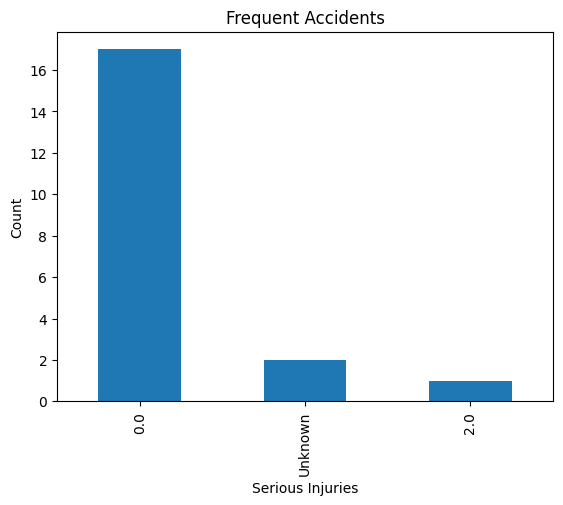

In [92]:

#Bar chart for frequent accidents
ax = df.head(20)['Total.Serious.Injuries'].value_counts().plot(kind='bar')
ax.set_title('Frequent Accidents')
ax.set_xlabel('Serious Injuries')
ax.set_ylabel('Count')
plt.show()

# **2.**
 It shows how many fatal and non-fatal injury count


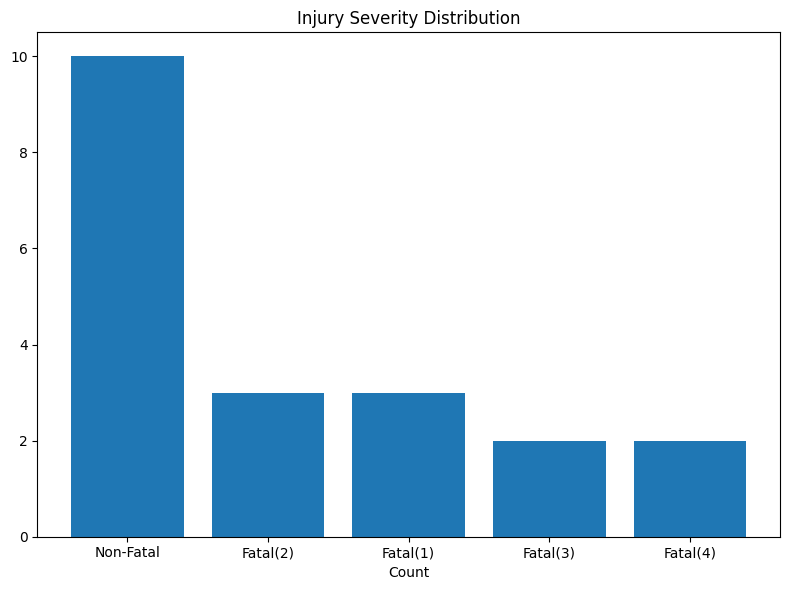

In [93]:
# bar chart of Injury Severity
severity_counts = df.head(20)['Injury.Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(severity_counts.index[::1], severity_counts.values[::1])
plt.title("Injury Severity Distribution")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

# **3.**
It shows a series of how an accident is serious in an accident

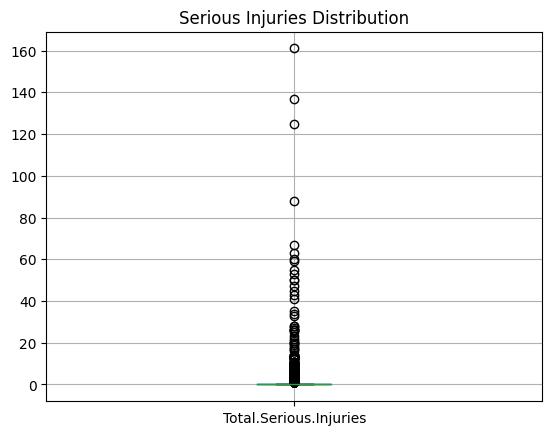

In [94]:
#Boxplot serious injuries per accident
df['Total.Serious.Injuries'] = pd.to_numeric(df['Total.Serious.Injuries'], errors='coerce').fillna(0)
df.boxplot(column=['Total.Serious.Injuries'])
plt.title('Serious Injuries Distribution')
plt.show()

# **4.**
It shows how the weather condition was during the accident

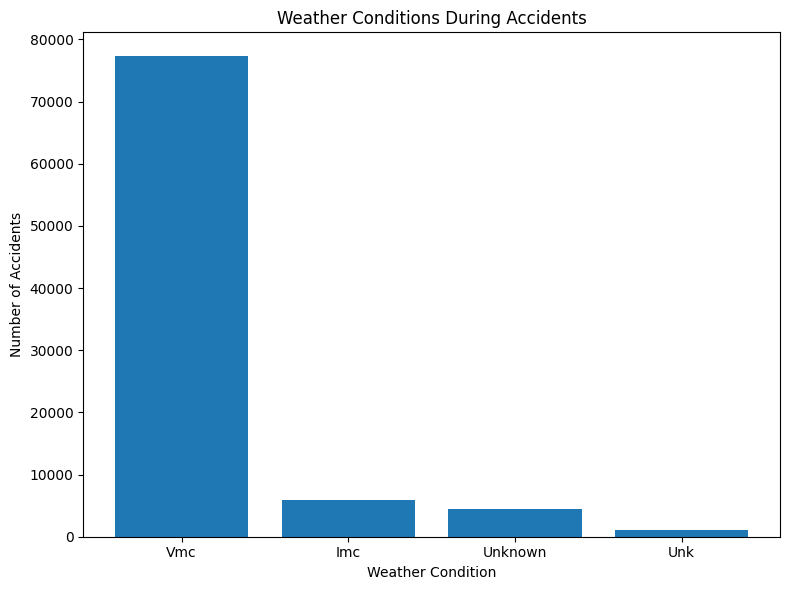

In [95]:
# Bar chart of accident counts by Weather Condition
weather_counts = df['Weather.Condition'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(weather_counts.index, weather_counts.values)
plt.title("Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

# **5.**
It shows if takeoff or landing when most accidents happen

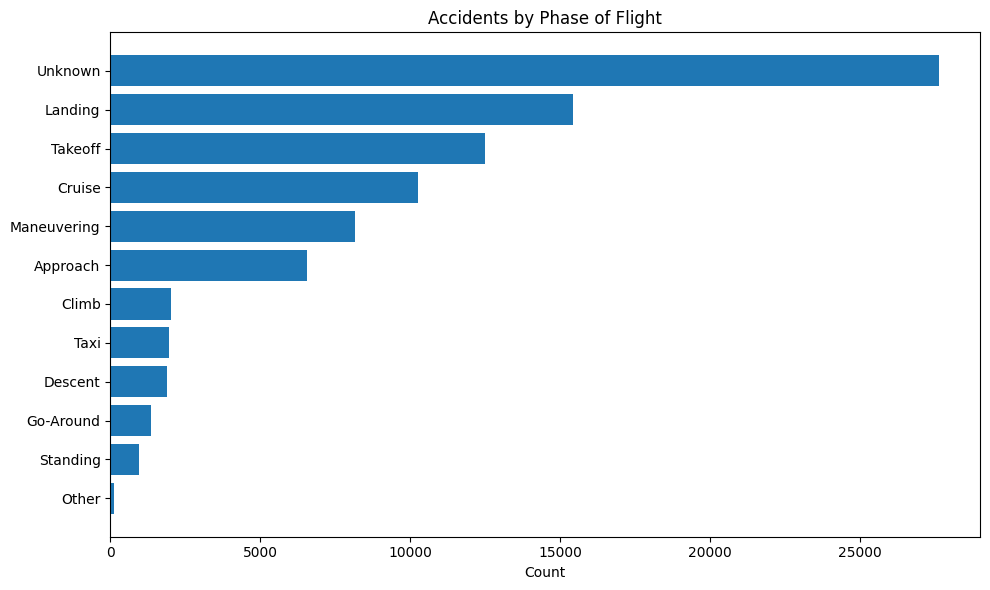

In [96]:
# Horizontal bar chart of Broad.phase.of.flight
phase_counts = df['Broad.phase.of.flight'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(phase_counts.index[::-1], phase_counts.values[::-1])
plt.title("Accidents by Phase of Flight")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

# **6.**
It shows yearly accidents and how often accidents occur in a year

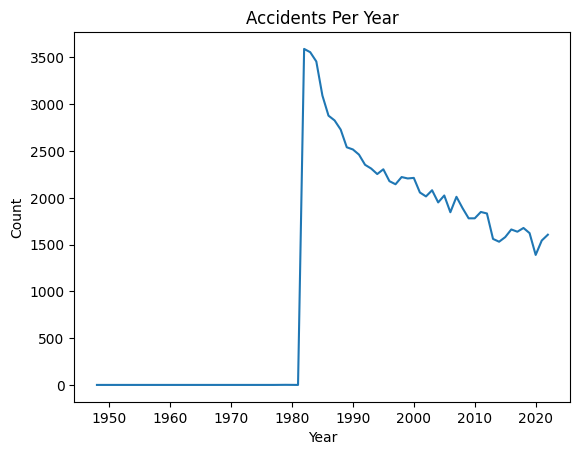

In [97]:
#Lineplot for accident per year
df['Year'] = df['Event.Date'].dt.year
df['Year'].value_counts().sort_index().plot()
plt.title("Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# **Objectives**
- Perform in-depth data cleaning on the aviation dataset
- Explore aviation incident patterns through 6 detailed visualizations
- Offer data-driven business recommendations and conclusions


# **Business Recommendation**
-Emphasize pilot training during critical flight approach and landing
-Prioritize maintenance of aircraft components prone to fatal damage
-Install security measures.
-Upgrade to better weather monitoring systems

# **Conclusion**
This analysis reveals trends in aviation safety, showing how geography, time, and flight conditions influence accident rates. With these insights, aviation authorities and airlines can take strategic actions to mitigate risks and improve safety for all stakeholders.
